<a href="https://colab.research.google.com/github/Balara00/ML_Lab01/blob/main/label_4/ML_Lab01_label_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import required packages and libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
#constants
L1 = 'label_1'
L2 = 'label_2'
L3 = 'label_3'
L4 = 'label_4'

LABELS = [L1, L2, L3, L4]
AGE_LABEL = L2
FEATURES = [f"feature_{i}" for i in range (1,257)]

Importing dataset

In [3]:
from google.colab import drive
MOUNT_PATH='/content/drive'
drive.mount(MOUNT_PATH)

Mounted at /content/drive


In [4]:
WORKING_DIR=f"{MOUNT_PATH}/MyDrive/ML_Lab 1"

In [5]:
train = pd.read_csv(f"{WORKING_DIR}/train.csv")
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,NaN,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,NaN,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,NaN,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,NaN,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,NaN,1,6


In [6]:
valid = pd.read_csv(f"{WORKING_DIR}/valid.csv")
valid.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.153148,-1.038098,1.419872,2.734152,1.154604,-1.086937,-0.516225,-1.370325,2.865359,-1.879877,...,-0.719046,-1.248530,0.144460,-3.240056,0.052614,0.083108,45,NaN,1,6
1,-1.377524,-1.018393,1.102352,2.849025,0.440302,-1.149039,-0.789796,-2.258196,1.264268,-2.123730,...,-1.383339,-0.787736,1.044895,-2.289637,0.199752,-0.712154,45,NaN,1,6
2,0.889574,-2.743300,-0.320194,3.047766,-0.923335,1.741686,-0.615148,0.756482,2.074775,-1.433126,...,1.178322,0.035333,0.857712,-1.928684,0.639870,-0.268576,45,NaN,1,6
3,-1.527213,-1.133121,0.385927,3.129767,0.229020,1.373105,0.919284,-0.755558,1.086973,-2.440614,...,-0.664176,0.805059,0.975368,-2.700269,1.523236,-1.259052,45,NaN,1,6
4,0.948176,-0.750248,0.008329,1.675338,1.941155,-0.783623,-0.485584,-0.261882,2.875204,-1.473030,...,-0.665200,-0.428060,-0.393100,-1.854657,2.207063,-0.342725,45,NaN,1,6


In [7]:
test = pd.read_csv(f"{WORKING_DIR}/test.csv")
test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.141206,-0.279703,1.019681,2.605902,0.460391,-1.167380,-1.149165,-1.205164,2.468966,-2.729526,...,-0.868282,-0.429783,0.438561,-1.625122,0.599944,-0.615575,NaN,NaN,NaN,NaN
1,-1.796767,-0.056758,0.771219,4.414086,-1.229059,1.732098,0.063241,-0.126311,1.322355,-3.461282,...,0.227806,0.209200,2.200402,-1.701029,1.163999,-1.570136,NaN,NaN,NaN,NaN
2,-1.388968,-0.418296,0.186543,2.803852,-1.499095,1.395180,0.739648,0.274060,1.228789,-3.081147,...,-0.692679,0.449235,1.377531,-1.854203,-0.040538,-2.164104,NaN,NaN,NaN,NaN
3,1.276844,-0.112323,-0.310796,2.251175,0.283670,-0.581020,-0.024439,-0.306097,2.424685,-1.714863,...,-0.690499,-1.077949,0.930102,-2.758352,-0.246738,-1.389013,NaN,NaN,NaN,NaN
4,-1.560815,-0.168494,1.249770,1.869219,-1.646049,0.132156,-0.664602,0.483327,1.728020,-2.258071,...,-0.510597,1.213396,2.497490,-1.597984,-0.163483,-1.735939,NaN,NaN,NaN,NaN


In [8]:
train[LABELS + [FEATURES[i] for i in range(0, 256, 32)]].describe()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28520 entries, 0 to 28519
Columns: 260 entries, feature_1 to label_4
dtypes: float64(257), int64(3)
memory usage: 56.6 MB


Scaling dataset

In [9]:
from sklearn.preprocessing import StandardScaler

x_train = {}
y_train = {}
x_valid = {}
y_valid = {}
x_test = {}
y_test = {}

for target_label in LABELS:
  train_ds = train[train['label_2'].notna()] if target_label == 'label_2' else train
  valid_ds = valid
  test_ds = test

  scaler = StandardScaler()
  x_train[target_label] = pd.DataFrame(scaler.fit_transform(train_ds.drop(LABELS, axis = 1)), columns=FEATURES)
  y_train[target_label] = train_ds[target_label]

  x_valid[target_label] = pd.DataFrame(scaler.transform(valid_ds.drop(LABELS, axis = 1)), columns=FEATURES)
  y_valid[target_label] = valid_ds[target_label]

  x_test[target_label] = pd.DataFrame(scaler.transform(test_ds.drop(LABELS, axis = 1)), columns=FEATURES)
  y_test[target_label] = test_ds[target_label]

In [10]:
y_train['label_2']

480      25.0
481      25.0
482      25.0
483      25.0
484      25.0
         ... 
28515    29.0
28516    29.0
28517    29.0
28518    29.0
28519    29.0
Name: label_2, Length: 28040, dtype: float64

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with a specified number of neighbors (e.g., n_neighbors=5)
clf = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model to the PCA-transformed features
clf.fit(x_train[L4], y_train[L4])

KNeighborsClassifier()

In [12]:
from sklearn import metrics

y_pred = clf.predict(x_valid[L4])
y_pred_test_before = clf.predict(x_test[L4])

In [13]:
print('Predicted labels before feature engineering:', y_pred_test_before)

Predicted labels before feature engineering: [ 6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6 13 13 13 13 13 13
 13 13  4  4  4  4  4  4  4  4  4  4  4  4  6  4  4  4  6  6  6  6  6  6
  6  6  6  6  6  6  5  5  5  5  5  5  5  5  5  5  5  1  1  1  1  1  1  1
  1  1  1  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  2  2  2  2  2  2  2  2
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7 12  7  7  7  7
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  3  3  3  3  3  3
  3  3  3  3  3  3  3  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6

In [14]:
print (metrics.confusion_matrix(y_valid[L4], y_pred))
print (metrics.accuracy_score(y_valid[L4], y_pred))
print (metrics.precision_score(y_valid[L4], y_pred, average="weighted"))
print (metrics.recall_score(y_valid[L4], y_pred, average="weighted"))

[[ 21   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  11   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  27   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   8   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  15   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  10   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 532   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1  31   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0  18   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  17   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  10   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0  25   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  10]]
0.9946666666666667
0.9947064676616915
0.9946666666666667


# Feature Engineering

### SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=75)
x_train_new = selector.fit_transform(x_train[L4], y_train[L4])
print("Shape: ", x_train_new.shape)

Shape:  (28520, 75)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with a specified number of neighbors (e.g., n_neighbors=5)
clf = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model to the selected features
clf.fit(x_train_new, y_train[L4])


# Transform the validation data using the same feature selection
x_valid_selected = selector.transform(x_valid[L4])

In [ ]:
# Make predictions on the validation set
y_pred = clf.predict(x_valid_selected)

# Evaluate the KNN classifier's performance
print(metrics.confusion_matrix(y_valid[L4], y_pred))
print(metrics.accuracy_score(y_valid[L4], y_pred))
print(metrics.precision_score(y_valid[L4], y_pred, average="weighted"))
print(metrics.recall_score(y_valid[L4], y_pred, average="weighted"))

[[ 21   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  10   0   0   0   0   0   0   0   0   0   0   1   0]
 [  0   0  27   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   8   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  15   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  10   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 532   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2  30   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0  18   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  17   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  10   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11   0   0]
 [  0   0   0   0   0   0   3   0   0   0   0   0  23   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  10]]
0.9893333333333333
0.9893434343434343
0.9893333333333333


### PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, svd_solver='full')
pca.fit(x_train[L4])
x_train_trf = pd.DataFrame(pca.transform(x_train[L4]))
x_valid_trf = pd.DataFrame(pca.transform(x_valid[L4]))

print("Shape after PCA: ", x_train_trf.shape)

Shape after PCA:  (28520, 67)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with a specified number of neighbors (e.g., n_neighbors=5)
clf = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model to the selected features
clf.fit(x_train_new, y_train[L4])


# Transform the validation data using the same feature selection
x_valid_selected = selector.transform(x_valid[L4])

In [ ]:
# Make predictions on the validation set
y_pred = clf.predict(x_valid_selected)

# Evaluate the KNN classifier's performance
print(metrics.confusion_matrix(y_valid[L4], y_pred))
print(metrics.accuracy_score(y_valid[L4], y_pred))
print(metrics.precision_score(y_valid[L4], y_pred, average="weighted"))
print(metrics.recall_score(y_valid[L4], y_pred, average="weighted"))

[[ 21   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  10   0   0   0   0   0   0   0   0   0   0   1   0]
 [  0   0  27   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   8   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  15   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  10   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 532   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2  30   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0  18   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  17   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  10   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11   0   0]
 [  0   0   0   0   0   0   3   0   0   0   0   0  23   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  10]]
0.9893333333333333
0.9893434343434343
0.9893333333333333


### PCA with SelectKBest

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

# Step 1: Feature selection with SelectKBest
selector = SelectKBest(f_classif, k=50)
x_train_new = selector.fit_transform(x_train[L4], y_train[L4])

# Step 2: Apply PCA to the selected features
pca = PCA(n_components=0.95, svd_solver='full')
x_train_pca = pca.fit_transform(x_train_new)

print("Shape after PCA: ", x_train_pca.shape)

Shape after PCA:  (28520, 32)


In [16]:
# Create a validation set with the same feature transformations
x_valid_new = selector.transform(x_valid[L4])
x_valid_pca = pca.transform(x_valid_new)

In [17]:
x_test_new = selector.transform(x_test[L4])
x_test_pca = pca.transform(x_test_new)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with a specified number of neighbors (e.g., n_neighbors=5)
clf = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model to the PCA-transformed features
clf.fit(x_train_pca, y_train[L4])

KNeighborsClassifier()

In [19]:
# Make predictions on the validation set
y_pred = clf.predict(x_valid_pca)

# Evaluate the KNN classifier's performance
print(metrics.confusion_matrix(y_valid[L4], y_pred))
print(metrics.accuracy_score(y_valid[L4], y_pred))
print(metrics.precision_score(y_valid[L4], y_pred, average="weighted"))
print(metrics.recall_score(y_valid[L4], y_pred, average="weighted"))

[[ 18   0   0   0   0   0   2   1   0   0   0   0   0   0]
 [  0  11   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  27   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   8   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  15   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  10   1   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0 529   0   1   0   0   0   1   0]
 [  0   0   0   0   0   0   2  30   0   0   0   0   0   0]
 [  0   0   0   0   0   0   3   0  16   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  17   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  10   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11   0   0]
 [  0   0   0   0   0   0   3   0   0   0   0   0  23   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  10]]
0.98
0.979765948464527
0.98


In [20]:
y_pred_test_after = clf.predict(x_test_pca)
print('Predicted labels before feature engineering:', y_pred_test_after)

Predicted labels before feature engineering: [ 6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6 13 13 13 13 13 13
 13 13  4  6  4  4  4  4  4  4  6  4  4  4  4  4  4  4  6  6  6  6  6  6
  6  6  6  6  6  6  5  5  5  5  5  5  5  5  5  5  5  1  1  1  1  1  1  1
  1  1  1  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  2  6  6  6  6  6  6  6  6  6  6  6  2  2  2  2  2  6  2  2
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  8  6  6  6  6  6  6
  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7  6  7  7  7  7
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  0  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  3  3  2  3  3  3
  3  3  3  3 13  3  3  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6

**Output**

In [21]:
# output_df = pd.DataFrame({
#     'Predicted labels before feature engineering': y_pred_test_before,
#     'Predicted labels after feature engineering': y_pred_test_after,
#     'No. of new features': x_test_pca.shape[1]
# })


# for i in range(257):  # Looping from 0 to 256 inclusive
#     column_name = f'new_feature_{i+1}'  # Construct the column name

#     # Check if the feature exists in x_test_pca
#     if i < x_test_pca.shape[1]:
#         output_df[column_name] = x_test_pca[:, i]  # Fill with the feature data
#     else:
#         output_df[column_name] = None  # Fill with blank or NaN values


# output_df.head()

# Create the base DataFrame
output_df = pd.DataFrame({
    'Predicted labels before feature engineering': y_pred_test_before,
    'Predicted labels after feature engineering': y_pred_test_after,
    'No of new features': [x_test_pca.shape[1]] * len(y_pred_test_before)
})

# List to store all the new feature Series
new_features = []

# Extract new features from x_test_pca
for i in range(min(256, x_test_pca.shape[1])):
    column_name = f'new_feature_{i+1}'
    new_features.append(pd.Series(x_test_pca[:, i], name=column_name))

# If there are any remaining columns to reach 256, fill them with NaN
for i in range(x_test_pca.shape[1], 256):
    column_name = f'new_feature_{i+1}'
    new_features.append(pd.Series([None] * len(output_df), name=column_name))

# Concatenate all the new feature columns to output_df
output_df = pd.concat([output_df] + new_features, axis=1)

output_df.head()

,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,new_feature_1,new_feature_2,new_feature_3,new_feature_4,new_feature_5,new_feature_6,new_feature_7,...,new_feature_247,new_feature_248,new_feature_249,new_feature_250,new_feature_251,new_feature_252,new_feature_253,new_feature_254,new_feature_255,new_feature_256
0,6,6,32,-3.657173,-1.701905,0.307897,2.797357,-3.034509,-1.316092,-0.835267,...,None,None,None,None,None,None,None,None,None,None
1,6,6,32,-3.892072,-0.181552,-0.086937,4.708701,-4.075517,-2.364200,2.095087,...,None,None,None,None,None,None,None,None,None,None
2,6,6,32,-2.601546,0.688463,0.936566,3.842602,-2.217239,-1.205346,-1.301554,...,None,None,None,None,None,None,None,None,None,None
3,6,6,32,-4.586315,-1.918792,1.325324,1.214985,-3.156929,0.604956,-0.283546,...,None,None,None,None,None,None,None,None,None,None
4,6,6,32,-3.562547,-2.289808,-1.098261,3.179493,-2.674830,0.007348,2.362425,...,None,None,None,None,None,None,None,None,None,None


In [22]:
# Save the DataFrame to the specified CSV file path
output_df.to_csv(f"{WORKING_DIR}/190572L_label_4_final.csv", index=False)

**Co-relation Matrix**

In [ ]:
# Convert the PCA-transformed features (x_train_pca) to a Pandas DataFrame
x_train_pca_df = pd.DataFrame(x_train_pca)

# Calculate the correlation matrix
corr_matrix = x_train_pca_df.corr()
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.000000e+00,-9.671812e-17,-2.580013e-16,3.210806e-17,2.887662e-16,8.823690e-17,1.084075e-16,9.233134e-17,-6.009607e-16,-2.749348e-17,...,4.511379e-16,-1.465520e-16,1.619206e-16,-9.416739e-17,6.942839e-17,-1.469968e-16,1.434285e-17,1.324435e-16,-3.607227e-16,3.055089e-16
1,-9.671812e-17,1.000000e+00,-2.562868e-16,-1.332671e-17,-5.552794e-16,-9.067600e-17,-6.958517e-17,-1.834015e-16,-1.177147e-16,5.000834e-16,...,-4.032903e-18,3.208117e-16,1.717593e-16,6.274107e-17,-2.916606e-17,2.678070e-16,3.363492e-16,1.292965e-16,2.027335e-17,1.989896e-16
2,-2.580013e-16,-2.562868e-16,1.000000e+00,6.789550e-16,6.266662e-17,-1.685390e-16,-5.599550e-19,-8.746158e-17,-5.521276e-16,4.163439e-16,...,-1.704211e-16,8.832677e-17,2.629350e-16,-7.819341e-17,-1.196790e-16,-3.772763e-16,4.566333e-16,-2.291263e-16,-1.325139e-17,3.531599e-17
3,3.210806e-17,-1.332671e-17,6.789550e-16,1.000000e+00,1.335691e-15,4.777014e-16,3.449830e-16,5.759395e-17,2.310452e-16,-8.068007e-17,...,3.916755e-16,-1.385916e-16,7.402801e-17,-2.112248e-16,-3.453700e-17,-1.908647e-16,3.939832e-16,-1.692665e-17,-1.411191e-16,1.004979e-16
4,2.887662e-16,-5.552794e-16,6.266662e-17,1.335691e-15,1.000000e+00,-8.530715e-17,5.713451e-17,-7.256781e-17,-4.198126e-16,-4.699422e-17,...,-1.289980e-16,-9.526161e-17,1.471151e-16,8.224922e-17,-2.491968e-17,2.610892e-17,-1.340987e-16,-1.140276e-18,-3.691555e-17,-8.064110e-17
5,8.823690e-17,-9.067600e-17,-1.685390e-16,4.777014e-16,-8.530715e-17,1.000000e+00,3.395624e-17,-3.870176e-16,3.608781e-16,-3.360542e-16,...,-2.534829e-16,1.839841e-16,1.990478e-16,-8.395015e-17,-6.243752e-17,-2.196628e-16,2.034708e-16,-5.191625e-17,-1.532031e-16,3.141743e-17
6,1.084075e-16,-6.958517e-17,-5.599550e-19,3.449830e-16,5.713451e-17,3.395624e-17,1.000000e+00,2.393652e-16,-8.104985e-16,-4.069493e-17,...,-1.121065e-16,1.643035e-16,-1.062581e-16,-1.837427e-17,-1.409721e-16,3.037517e-17,2.563209e-16,-1.288776e-16,-1.680420e-16,7.452957e-18
7,9.233134e-17,-1.834015e-16,-8.746158e-17,5.759395e-17,-7.256781e-17,-3.870176e-16,2.393652e-16,1.000000e+00,-1.570743e-16,-1.906374e-16,...,2.112432e-16,-4.541389e-17,1.588921e-16,-2.292047e-16,-1.985631e-16,1.145106e-16,1.334405e-16,6.865632e-18,-1.837568e-17,-2.358302e-16
8,-6.009607e-16,-1.177147e-16,-5.521276e-16,2.310452e-16,-4.198126e-16,3.608781e-16,-8.104985e-16,-1.570743e-16,1.000000e+00,-4.353113e-16,...,-1.579042e-16,3.731905e-16,-1.841540e-16,-1.397133e-16,1.340980e-17,1.363430e-16,-1.465574e-16,2.270365e-16,1.053483e-17,2.518899e-17
9,-2.749348e-17,5.000834e-16,4.163439e-16,-8.068007e-17,-4.699422e-17,-3.360542e-16,-4.069493e-17,-1.906374e-16,-4.353113e-16,1.000000e+00,...,4.820296e-18,2.103203e-17,-4.754371e-16,2.393394e-16,-1.128052e-16,4.146856e-16,-2.228868e-17,-3.192243e-17,-1.158560e-16,4.610604e-20


<Axes: >

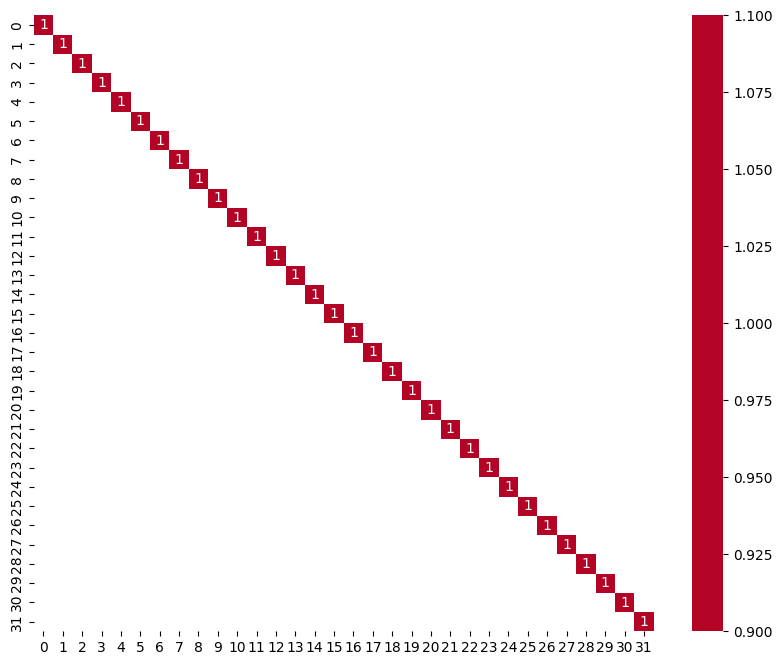

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_treshold = 0.5
filterred_correlation_matrix = corr_matrix[(corr_matrix > corr_treshold) | (corr_matrix < -corr_treshold)]
plt.figure(figsize=(10,8))
sns.heatmap(filterred_correlation_matrix, annot=True, cmap='coolwarm', center = 0)